In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

First, I'm going to create a list of cities

In [1]:
places = ['Minneapolis, MN','New York City, NY']

In [6]:

df = pd.DataFrame({'name': ['Minneapolis', 'New York City', 'london']})

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="GoogleV3")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df['location'] = df['name'].apply(geocode)

df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [7]:
print(df)

            name                                           location  \
0    Minneapolis  (Minneapolis, Hennepin County, Minnesota, Unit...   
1  New York City  (New York, United States of America, (40.71272...   
2         london  (London, Greater London, England, SW1A 2DX, Un...   

                            point  
0  (44.9772995, -93.2654692, 0.0)  
1  (40.7127281, -74.0060152, 0.0)  
2   (51.5073219, -0.1276474, 0.0)  


In [10]:
df.rename( columns={3 :'hello'}, inplace=True)

            name                                           location  \
0    Minneapolis  (Minneapolis, Hennepin County, Minnesota, Unit...   
1  New York City  (New York, United States of America, (40.71272...   
2         london  (London, Greater London, England, SW1A 2DX, Un...   

                            point  
0  (44.9772995, -93.2654692, 0.0)  
1  (40.7127281, -74.0060152, 0.0)  
2   (51.5073219, -0.1276474, 0.0)  


In [17]:
print(df.dtypes)
print(df['point'])

name        object
location    object
point       object
dtype: object
0    (44.9772995, -93.2654692, 0.0)
1    (40.7127281, -74.0060152, 0.0)
2     (51.5073219, -0.1276474, 0.0)
Name: point, dtype: object


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


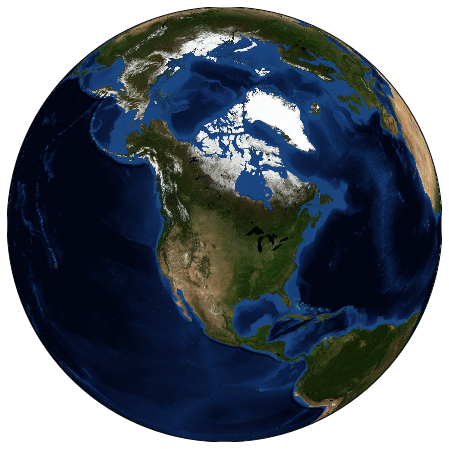

In [6]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

In [17]:
lat = [43.866218,3.790262]
lon = [-93.308954,-67.736020]

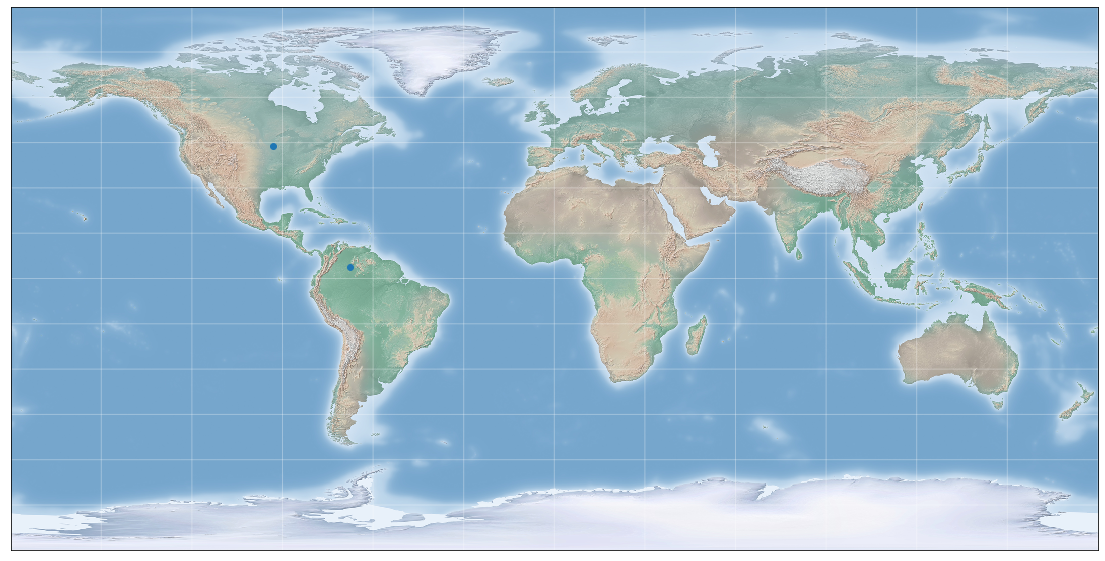

In [36]:
fig = plt.figure(figsize=(20, 10), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
llcrnrlat=-90, urcrnrlat=90,
llcrnrlon=-180, urcrnrlon=180, )
m.scatter(lon, lat, latlon=True,cmap='Reds', alpha=1)
draw_map(m)


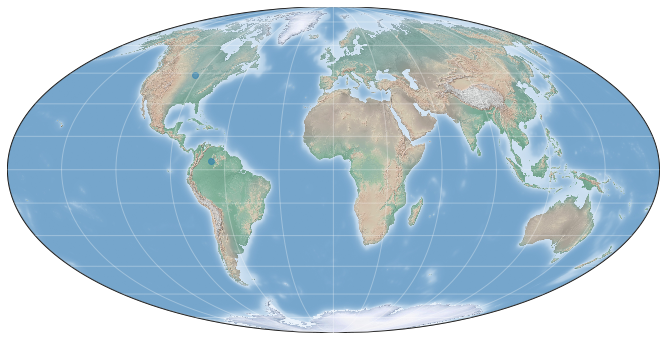

In [30]:
plt.figure(figsize=(20, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,lat_0=0, lon_0=0)
m.scatter(lon, lat, latlon=True,
cmap='Reds', alpha=0.5)
draw_map(m)

In [42]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='l',
lat_0=0, lon_0=0,
width=1000000, height=1200000)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
c=np.log10(population), s=area,
cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,label=str(a) + ' km$^2$')
    plt.legend(scatterpoints=1, frameon=False,labelspacing=1, loc='lower left');

RuntimeError: b'conic lat_1 = -lat_2'

<Figure size 576x576 with 0 Axes>

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


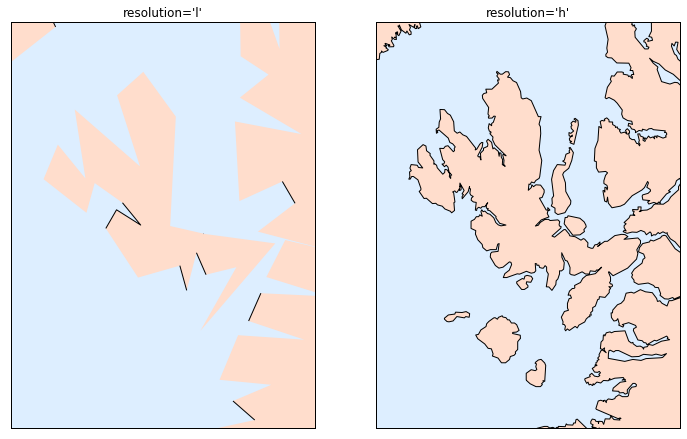

In [40]:
ig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
                width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res));